## Libraries

In [132]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Part 1 - Data Preprocessing

In [133]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

In [134]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values  

In [135]:
pd.DataFrame(X, columns = ["Gender", "Age", "Hypertension", "HeartDisease", "SmokingHistory", "BMI", "HbA1cLevel", "BloodGlucoseLevel"])

,Gender,Age,Hypertension,HeartDisease,SmokingHistory,BMI,HbA1cLevel,BloodGlucoseLevel
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [136]:
pd.DataFrame(y, columns = ["Diabetes"])

,Diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


### Encoding categorical data

Label Encoding the "Gender" and "SmokingHistory" columns

In [137]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [138]:
print(X)

[[0 80.0 0 ... 25.19 6.6 140]
 [0 54.0 0 ... 27.32 6.6 80]
 [1 28.0 0 ... 27.32 5.7 158]
 ...
 [1 66.0 0 ... 27.83 5.7 155]
 [0 24.0 0 ... 35.42 4.0 100]
 [0 57.0 0 ... 22.43 6.6 90]]


In [139]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [140]:
print(X)

[[0.0 0.0 0.0 ... 25.19 6.6 140]
 [1.0 0.0 0.0 ... 27.32 6.6 80]
 [0.0 0.0 0.0 ... 27.32 5.7 158]
 ...
 [0.0 0.0 0.0 ... 27.83 5.7 155]
 [0.0 0.0 0.0 ... 35.42 4.0 100]
 [0.0 1.0 0.0 ... 22.43 6.6 90]]


### Splitting the dataset into the Training set and Test set

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling


In [142]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN


### Initializing the ANN


In [143]:
ann = tf.keras.models.Sequential()

In [144]:
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=7, activation='linear'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=7, activation='linear'))

# Adding the third hidden layer
ann.add(tf.keras.layers.Dense(units=7, activation='linear'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN


### Compiling the ANN


In [145]:
ann.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [146]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
2500/2500 [==============================] - 2s 787us/step - loss: 0.1407 - accuracy: 0.9517
Epoch 2/100
2500/2500 [==============================] - 2s 776us/step - loss: 0.1149 - accuracy: 0.9592
Epoch 3/100
2500/2500 [==============================] - 2s 757us/step - loss: 0.1151 - accuracy: 0.9595
Epoch 4/100
2500/2500 [==============================] - 2s 770us/step - loss: 0.1151 - accuracy: 0.9592
Epoch 5/100
2500/2500 [==============================] - 2s 875us/step - loss: 0.1151 - accuracy: 0.9594
Epoch 6/100
2500/2500 [==============================] - 2s 832us/step - loss: 0.1151 - accuracy: 0.9593
Epoch 7/100
2500/2500 [==============================] - 2s 926us/step - loss: 0.1152 - accuracy: 0.9591
Epoch 8/100
2500/2500 [==============================] - 2s 810us/step - loss: 0.1151 - accuracy: 0.9593
Epoch 9/100
2500/2500 [==============================] - 2s 834us/step - loss: 0.1153 - accuracy: 0.9591
Epoch 10/100
2500/2500 [==============================]

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [147]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

625/625 [==============================] - 0s 581us/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [148]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
accuracy = accuracy_score(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("The accuracy is " + str(accuracy))
print("The specificity is " + str(specificity))
print("The sensitivity is " + str(sensitivity))

[[18042   255]
 [  563  1140]]
The accuracy is 0.9591
The specificity is 0.9860632890637809
The sensitivity is 0.6694069289489136


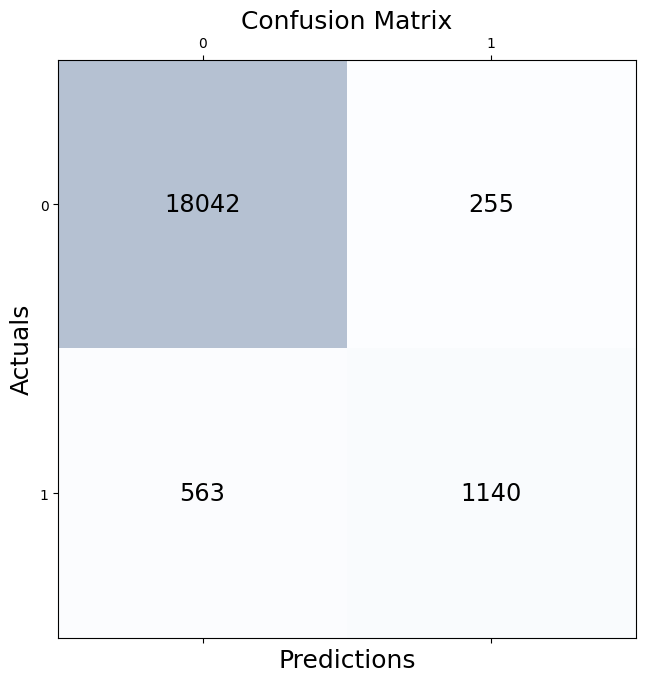

In [149]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()